In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from kid_readout import *
from kid_readout.measurement import mmw_source_sweep, temperature
import glob

In [3]:
fns = glob.glob('/artemis/readout/2016-04-20*off_on*.nc')
fns.sort()

In [4]:
fns[-1]

'/artemis/readout/2016-04-20_230249_off_on_modulated_2_dB_dac.nc'

In [8]:
import joblib

In [9]:
pp = joblib.Parallel(n_jobs=8)

In [11]:
def process_fn(fn):
    ncf = NCFile(fn,cache_s21_raw=True)
    mmws = mmw_source_sweep.MMWSweepOnMod(ncf.SweepArray0,ncf.StreamArray1,ncf.StreamArray2)
    temperature.add_temperature(mmws,cryostat='starcryo')
    return mmws.to_dataframe()



In [ ]:
pp.

In [ ]:
rows = []
for fn in fns:
    print fn
    ncf = NCFile(fn,cache_s21_raw=True)
    mmws = mmw_source_sweep.MMWSweepOnMod(ncf.SweepArray0,ncf.StreamArray1,ncf.StreamArray2)
    temperature.add_temperature(mmws,cryostat='starcryo')
    rows.append(mmws.to_dataframe())
    ncf.close()

/artemis/readout/2016-04-20_000046_off_on_modulated_10_dB_dac.nc
/artemis/readout/2016-04-20_000154_off_on_modulated_6_dB_dac.nc
/artemis/readout/2016-04-20_000302_off_on_modulated_2_dB_dac.nc
/artemis/readout/2016-04-20_000426_off_on_modulated_20_dB_dac.nc
/artemis/readout/2016-04-20_000536_off_on_modulated_10_dB_dac.nc
/artemis/readout/2016-04-20_000644_off_on_modulated_6_dB_dac.nc
/artemis/readout/2016-04-20_000756_off_on_modulated_2_dB_dac.nc


In [13]:
len(rows)

47

In [14]:
import pandas as pd

In [15]:
df = pd.concat(rows,ignore_index=True)

In [16]:
df.shape

(3008, 79)

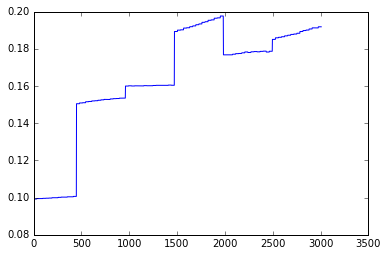

In [17]:
plot(df.temperature_primary_package)

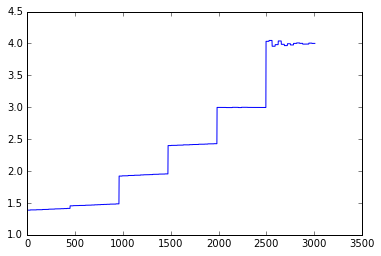

In [18]:
plot(df.temperature_primary_load)

In [39]:
r0 = df[(df.number==17) & (df.res_f_0 < 1300e6)]

In [41]:
14e3/1.2e9

1.1666666666666666e-05

In [38]:
15/2.

7.5

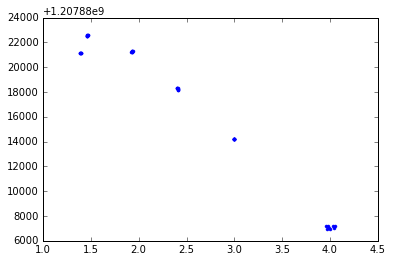

In [40]:
plot(r0.temperature_primary_load,r0.res_f_0,'.')

In [ ]:
for k,row in r0.iterrows():

In [43]:
row.index

Index([                        u'S_frequency',
                                      u'S_qq',
                                      u'S_xx',
                                      u'S_yy',
                         u'hittite_frequency',
                         u'hittite_output_on',
                         u'hittite_power_dBm',
                 u'lockin_detection_harmonic',
                     u'lockin_identification',
                u'lockin_input_configuration',
                     u'lockin_input_coupling',
                 u'lockin_input_notch_filter',
             u'lockin_input_shield_grounding',
                              u'lockin_local',
                u'lockin_output_filter_slope',
                u'lockin_reference_frequency',
                    u'lockin_reference_phase',
                   u'lockin_reference_source',
                  u'lockin_reference_trigger',
                       u'lockin_reserve_mode',
                        u'lockin_rms_voltage',
             

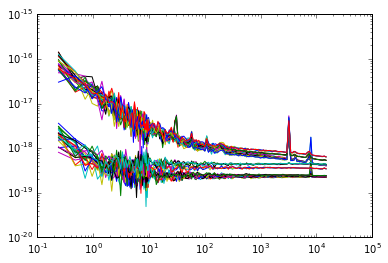

In [49]:
for k,row in r0.iterrows():
    if row.roach_modulation_output == 1:
        loglog(row.S_frequency[1:],row.S_xx[1:])#-row.S_yy[-1])
        loglog(row.S_frequency[1:],row.S_yy[1:])#-row.S_yy[-1])

In [5]:
ncf = NCFile(fns[-1])

In [7]:
mmws = mmw_source_sweep.MMWSweepOnMod(ncf.SweepArray0,ncf.StreamArray1,ncf.StreamArray2)

In [8]:
sson, ssmod = mmws.sweep_stream_pair(15)

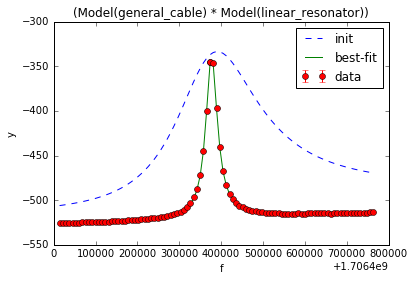

In [18]:
sson.sweep.resonator.current_result.plot_fit()

In [10]:
fx = ssmod.stream.fold(ssmod.x)

In [19]:
fs21 = ssmod.stream.fold(ssmod.stream_s21_normalized)

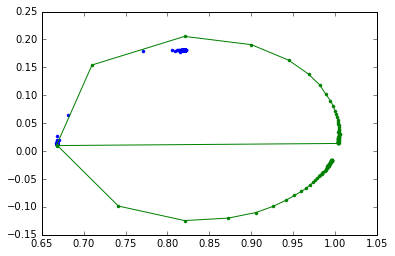

In [22]:
plot_ri(fs21,'.')
plot_ri(ssmod.sweep.s21_normalized,'.-')

In [24]:
ssmod.sweep.resonator.Q

50810.978979958621

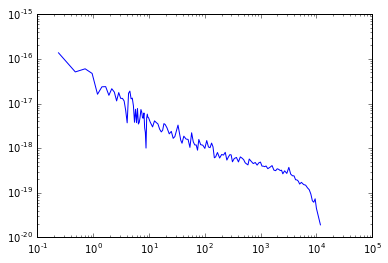

In [31]:
loglog(sson.S_frequency[1:],sson.S_xx[1:]-sson.S_xx[-2])

In [11]:
fx.shape

(256,)

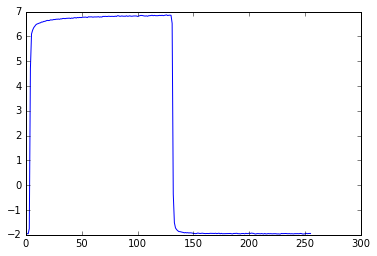

In [16]:
plot(fx*1e6)